In [40]:
import pandas as pd
import glob
from datetime import datetime
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline

In [42]:
path =r'/Users/vpro/Dropbox/data/bank/test/2204324/22043240005/' 
allFiles = glob.glob(path + "/*.txt")
allData = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    if 'categorie' in df:
        del df['categorie']
    if 'compte' in df:
        del df['compte']
    if 'contrat' in df:
        del df['contrat']
    #list_.append(df)
    allData = allData.append(df, ignore_index=True)


Check Data coherence 

In [43]:
allData.loc[allData['dateOperation'].str.contains('RETRAIT')]

,ref,dateOperation,dateValeur,libelleOperation,montantDebit,montantCredit,montantSolde


convertin date from string

In [44]:
dformat = '%a %b %d %H:%M:%S %Z %Y'
allData['dateOperation'] = allData['dateOperation'].apply(lambda t:datetime.strptime(t, dformat))


In [45]:
allData['dateValeur'] = allData['dateValeur'].apply(lambda t:datetime.strptime(t, dformat))

cleaning DATA

In [46]:
allData = allData.replace( "<null>",  0 )

In [47]:
allData.montantDebit = allData.montantDebit.apply(lambda x:float(x))

In [48]:
allData.montantCredit = allData.montantCredit.apply(lambda x:float(x))

In [49]:
allData.head()

,ref,dateOperation,dateValeur,libelleOperation,montantDebit,montantCredit,montantSolde
0,250061,2015-12-07,2015-12-08,VERSEMENT EFFECTUE PAR SAMIR KAILY BB56653,0.0,1200.0,200092.47
1,071215,2015-12-07,2015-12-04,ORDRE DE VIREMENT EN FAVEUR DE MR SEMMAMI MOHAMED,2100.0,0.0,200092.47
2,071215,2015-12-07,2015-12-04,ORDRE DE VIREMENT EN FAVEUR DE MR OMAR EL AIBI,1000.0,0.0,200092.47
3,000007,2015-12-08,2015-12-04,COMMISSION,6.0,0.0,198086.47
4,000007,2015-12-08,2015-12-04,RETRAIT GAB EFFECTUE CHEZ BMCE BANK MOHAMMEDIA,2000.0,0.0,198086.47


In [50]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
ref                 505 non-null object
dateOperation       505 non-null datetime64[ns]
dateValeur          505 non-null datetime64[ns]
libelleOperation    505 non-null object
montantDebit        505 non-null float64
montantCredit       505 non-null float64
montantSolde        505 non-null float64
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 27.7+ KB


In [51]:
allData['DayOfWeekNum'] = allData['dateOperation'].dt.dayofweek
allData['DayOfWeek'] = allData['dateOperation'].dt.weekday_name
allData['MonthDayNum'] = allData['dateOperation'].dt.day
allData['Month'] = allData['dateOperation'].dt.month
allData['Year'] = allData['dateOperation'].dt.year

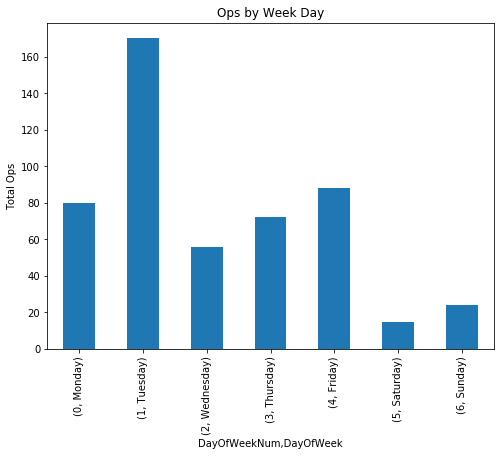

In [52]:
trx_weekdays = allData.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='ref',
                                  aggfunc='count')
trx_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Ops')
plt.title('Ops by Week Day');

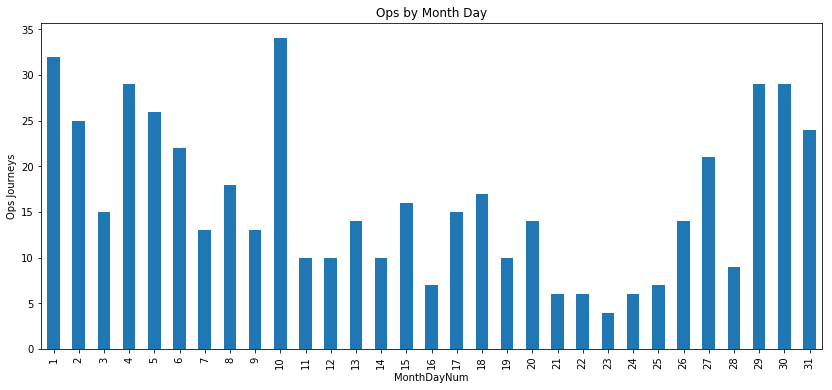

In [53]:
trx_monthdays = allData.pivot_table(index=['MonthDayNum'],
                                  values='ref',
                                  aggfunc='count')
trx_monthdays.plot(kind='bar', figsize=(14,6))
plt.ylabel('Ops Journeys')
plt.title('Ops by Month Day');

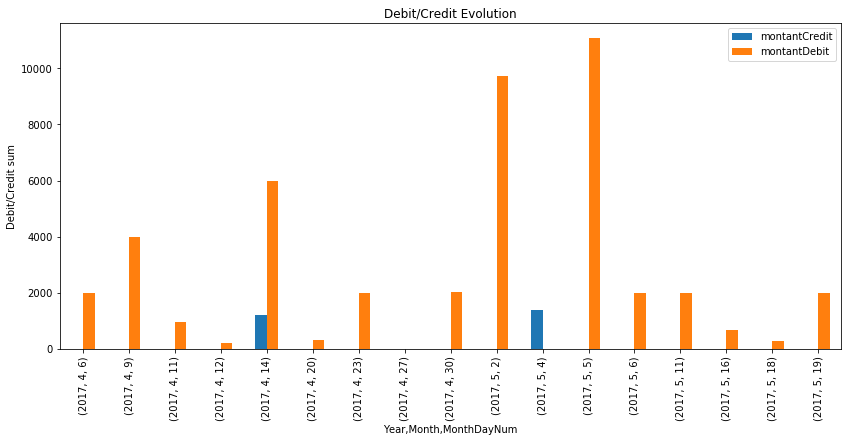

In [72]:

filtered_data = allData[(allData.dateOperation >= '2017-04-05')]
trx_byDate = filtered_data.pivot_table(index=['Year', 'Month', 'MonthDayNum'],
                                  aggfunc={'montantDebit' : 'sum', 'montantCredit' : 'sum'})
trx_byDate.plot(kind='bar', figsize=(14,6))
plt.ylabel('Debit/Credit sum')
plt.title('Debit/Credit Evolution');

Filtring

In [73]:
allData[(allData.dateOperation >= '2017-04-07') ]


,ref,dateOperation,dateValeur,libelleOperation,montantDebit,montantCredit,montantSolde,DayOfWeekNum,DayOfWeek,MonthDayNum,Month,Year
472,0F1997,2017-04-09,2017-04-07,RETRAIT GAB HASSANIA VILLE DE MOHAMMEDIA HEURE...,2000.00,0.0,321757.30,6,Sunday,9,4,2017
473,0R2299,2017-04-09,2017-04-07,RETRAIT GAB HASSANIA VILLE DE MOHAMMEDIA HEURE...,2000.00,0.0,321757.30,6,Sunday,9,4,2017
474,508444,2017-04-11,2017-04-07,ACHAT PAR CARTE DE PAIEMENT CHEZ MARJANE MOHAM...,778.64,0.0,320800.66,1,Tuesday,11,4,2017
475,268292,2017-04-11,2017-04-07,ACHAT PAR CARTE DE PAIEMENT CHEZ DECATHLON MOH...,178.00,0.0,320800.66,1,Tuesday,11,4,2017
476,598328,2017-04-12,2017-04-10,ACHAT PAR CARTE DE PAIEMENT CHEZ ACIMA MOHAMED...,213.39,0.0,320587.27,2,Wednesday,12,4,2017
477,865953,2017-04-14,2017-04-14,ORDRE DE VIREMENT,4000.00,0.0,315787.27,4,Friday,14,4,2017
478,550024,2017-04-14,2017-04-17,VERSEMENT EFFECTUE PAR SAMIR KAILY BB 56653,0.00,1200.0,315787.27,4,Friday,14,4,2017
479,0Q8605,2017-04-14,2017-04-13,RETRAIT GAB CENTRE D'AFFAIRES ATTANMI VILLE DE...,2000.00,0.0,315787.27,4,Friday,14,4,2017
480,794835,2017-04-20,2017-04-17,ACHAT PAR CARTE DE PAIEMENT CHEZ ASWAK ASSALAM...,317.80,0.0,315469.47,3,Thursday,20,4,2017
481,0H2865,2017-04-23,2017-04-21,RETRAIT GAB HASSANIA VILLE DE MOHAMMEDIA HEURE...,2000.00,0.0,313469.47,6,Sunday,23,4,2017


using Group by to show evolution

In [ ]:
aggdf = allData.groupby(['dateOperation'],as_index = False)[["montantDebit", "montantCredit"]].sum()

In [ ]:
aggdf.head()

In [ ]:
aggdf.dtypes

some charts & graphics 

In [ ]:
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()


In [ ]:
p = figure(plot_width=1000, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding lines'

for name, color in zip(['montantDebit', 'montantCredit'], Spectral4):
    p.line(aggdf['dateOperation'], aggdf[name], line_width=2, color=color, alpha=0.8, legend=name)

p.legend.location = "top_left"
#p.legend.click_policy="hide"

show(p)